In [0]:
from pyspark.sql.types import StructField, StructType, IntegerType, StringType, BooleanType, DateType, DecimalType
from pyspark.sql.functions import col, when, sum, avg, row_number
from pyspark.sql.window import Window

In [0]:
from pyspark.sql import SparkSession

#create session
spark = SparkSession.builder.appName("IPL Data Analysis").getOrCreate()

In [0]:
spark

SparkSession - hive 
 
 
 SparkContext 

 Spark UI 

 
 Version 
 v3.3.2 
 Master 
 local[8] 
 AppName 
 Databricks Shell

In [0]:
ball_by_ball_schema = StructType([
    StructField("match_id", IntegerType(), True),
    StructField("over_id", IntegerType(), True),
    StructField("ball_id", IntegerType(), True),
    StructField("innings_no", IntegerType(), True),
    StructField("team_batting", StringType(), True),
    StructField("team_bowling", StringType(), True),
    StructField("striker_batting_position", IntegerType(), True),
    StructField("extra_type", StringType(), True),
    StructField("runs_scored", IntegerType(), True),
    StructField("extra_runs", IntegerType(), True),
    StructField("wides", IntegerType(), True),
    StructField("legbyes", IntegerType(), True),
    StructField("byes", IntegerType(), True),
    StructField("noballs", IntegerType(), True),
    StructField("penalty", IntegerType(), True),
    StructField("bowler_extras", IntegerType(), True),
    StructField("out_type", StringType(), True),
    StructField("caught", BooleanType(), True),
    StructField("bowled", BooleanType(), True),
    StructField("run_out", BooleanType(), True),
    StructField("lbw", BooleanType(), True),
    StructField("retired_hurt", BooleanType(), True),
    StructField("stumped", BooleanType(), True),
    StructField("caught_and_bowled", BooleanType(), True),
    StructField("hit_wicket", BooleanType(), True),
    StructField("obstructingfeild", BooleanType(), True),
    StructField("bowler_wicket", BooleanType(), True),
    StructField("match_date", DateType(), True),
    StructField("season", IntegerType(), True),
    StructField("striker", IntegerType(), True),
    StructField("non_striker", IntegerType(), True),
    StructField("bowler", IntegerType(), True),
    StructField("player_out", IntegerType(), True),
    StructField("fielders", IntegerType(), True),
    StructField("striker_match_sk", IntegerType(), True),
    StructField("strikersk", IntegerType(), True),
    StructField("nonstriker_match_sk", IntegerType(), True),
    StructField("nonstriker_sk", IntegerType(), True),
    StructField("fielder_match_sk", IntegerType(), True),
    StructField("fielder_sk", IntegerType(), True),
    StructField("bowler_match_sk", IntegerType(), True),
    StructField("bowler_sk", IntegerType(), True),
    StructField("playerout_match_sk", IntegerType(), True),
    StructField("battingteam_sk", IntegerType(), True),
    StructField("bowlingteam_sk", IntegerType(), True),
    StructField("keeper_catch", BooleanType(), True),
    StructField("player_out_sk", IntegerType(), True),
    StructField("matchdatesk", DateType(), True)

])

In [0]:
ball_by_ball_df = spark.read.schema(ball_by_ball_schema).format("csv").option("header","true").load("s3://ipl-data-analysis/Ball_By_Ball.csv")

In [0]:
ball_by_ball_df.show(5)

+--------+-------+-------+----------+------------+------------+------------------------+----------+-----------+----------+-----+-------+----+-------+-------+-------------+--------------+------+------+-------+----+------------+-------+-----------------+----------+----------------+-------------+----------+------+-------+-----------+------+----------+--------+----------------+---------+-------------------+-------------+----------------+----------+---------------+---------+------------------+--------------+--------------+------------+-------------+-----------+
|match_id|over_id|ball_id|innings_no|team_batting|team_bowling|striker_batting_position|extra_type|runs_scored|extra_runs|wides|legbyes|byes|noballs|penalty|bowler_extras|      out_type|caught|bowled|run_out| lbw|retired_hurt|stumped|caught_and_bowled|hit_wicket|obstructingfeild|bowler_wicket|match_date|season|striker|non_striker|bowler|player_out|fielders|striker_match_sk|strikersk|nonstriker_match_sk|nonstriker_sk|fielder_match_sk|

In [0]:
match_schema = StructType([
    StructField("match_sk", IntegerType(), True),
    StructField("match_id", IntegerType(), True),
    StructField("team1", StringType(), True),
    StructField("team2", StringType(), True),
    StructField("match_date", DateType(), True),
    StructField("season_year", IntegerType(), True),
    StructField("venue_name", StringType(), True),
    StructField("city_name", StringType(), True),
    StructField("country_name", StringType(), True),
    StructField("toss_winner", StringType(), True),
    StructField("match_winner", StringType(), True),
    StructField("toss_name", StringType(), True),
    StructField("win_type", StringType(), True),
    StructField("outcome_type", StringType(), True),
    StructField("manofmach", StringType(), True),
    StructField("win_margin", IntegerType(), True),
    StructField("country_id", IntegerType(), True)
])

match_df = spark.read.schema(match_schema).format("csv").option("header", "true").load("s3://ipl-data-analysis-project/Match.csv")

In [0]:
player_schema = StructType([
    StructField("player_sk", IntegerType(), True),
    StructField("player_id", IntegerType(), True),
    StructField("player_name", StringType(), True),
    StructField("dob", DateType(), True),
    StructField("batting_hand", StringType(), True),
    StructField("bowling_skill", StringType(), True),
    StructField("country_name", StringType(), True)
])

player_df = spark.read.schema(player_schema).format("csv").option("header", "true").load("s3://ipl-data-analysis-project/Player.csv")

In [0]:
player_match_schema = StructType([
    StructField("player_match_sk", IntegerType(), True),
    StructField("playermatch_key", DecimalType(), True),
    StructField("match_id", IntegerType(), True),
    StructField("player_id", IntegerType(), True),
    StructField("player_name", StringType(), True),
    StructField("dob", DateType(), True),
    StructField("batting_hand", StringType(), True),
    StructField("bowling_skill", StringType(), True),
    StructField("country_name", StringType(), True),
    StructField("role_desc", StringType(), True),
    StructField("player_team", StringType(), True),
    StructField("opposit_team", StringType(), True),
    StructField("season_year", IntegerType(), True),
    StructField("is_manofthematch", BooleanType(), True),
    StructField("age_as_on_match", IntegerType(), True),
    StructField("isplayers_team_won", BooleanType(), True),
    StructField("batting_status", StringType(), True),
    StructField("bowling_status", StringType(), True),
    StructField("player_captain", StringType(), True),
    StructField("opposit_captain", StringType(), True),
    StructField("player_keeper", StringType(), True),
    StructField("opposit_keeper", StringType(), True)
])

player_match_df = spark.read.schema(player_match_schema).format("csv").option("header", "true").load("s3://ipl-data-analysis-project/Player_match.csv")

In [0]:
team_schema = StructType([
    StructField("team_sk", IntegerType(), True),
    StructField("team_id", IntegerType(), True),
    StructField("team_name", StringType(), True)
])

team_df = spark.read.schema(team_schema).format("csv").option("header","true").load("s3://ipl-data-analysis-project/Team.csv")

In [0]:
# Filter to include only valid deliveries (excluding extras like wides and no balls for specific analyses)
ball_by_ball_df = ball_by_ball_df.filter((col("wides") == 0) & (col("noballs") == 0))


In [0]:
# Aggregation: Calculate the total and average runs scored in each match and inning
total_and_avg_runs = ball_by_ball_df.groupBy("match_id", "innings_no").agg(
    sum("runs_scored").alias("total_runs"),
    avg("runs_scored").alias("average_runs"))
                                                                         

In [0]:
# Window Function: Calculate running total of runs in each match for each over
#withcol - adding a new col.
windowSpec = Window.partitionBy("match_id", "innings_no").orderBy("over_id")

ball_by_ball_df = ball_by_ball_df.withColumn(
    "running_total_runs",
    sum("runs_scored").over(windowSpec)
)

In [0]:
# Conditional Column: Flag for high impact balls (either a wicket or more than 6 runs including extras) - any of the condition is true it returns True else False
ball_by_ball_df = ball_by_ball_df.withColumn(
    "high_impact",
    when((col("runs_scored") + col("extra_runs") > 6) | (col("bowler_wicket") == True), True).otherwise(False)
)

In [0]:
from pyspark.sql.functions import year, month, dayofmonth, when

# Extracting year, month, and day from the match date for more detailed time-based analysis
match_df = match_df.withColumn("year", year("match_date"))
match_df = match_df.withColumn("month", month("match_date"))
match_df = match_df.withColumn("day", dayofmonth("match_date"))

# High margin win: categorizing win margins into 'high', 'medium', and 'low'
match_df = match_df.withColumn(
    "win_margin_category",
    when(col("win_margin") >= 100, "High")
    .when((col("win_margin") >= 50) & (col("win_margin") < 100), "Medium")
    .otherwise("Low")
)

# Analyze the impact of the toss: who wins the toss and the match
match_df = match_df.withColumn(
    "toss_match_winner",
    when(col("toss_winner") == col("match_winner"), "Yes").otherwise("No")
)

match_df.show(3)

+--------+--------+--------------------+--------------------+----------+-----------+--------------------+----------+------------+--------------------+--------------------+---------+--------+------------+-----------+----------+----------+----+-----+----+-------------------+-----------------+
|match_sk|match_id|               team1|               team2|match_date|season_year|          venue_name| city_name|country_name|         toss_winner|        match_winner|toss_name|win_type|outcome_type|  manofmach|win_margin|country_id|year|month| day|win_margin_category|toss_match_winner|
+--------+--------+--------------------+--------------------+----------+-----------+--------------------+----------+------------+--------------------+--------------------+---------+--------+------------+-----------+----------+----------+----+-----+----+-------------------+-----------------+
|       0|  335987|Royal Challengers...|Kolkata Knight Ri...|      null|       2008|M Chinnaswamy Sta...| Bangalore|       I

In [0]:
from pyspark.sql.functions import lower, regexp_replace

## Normalize and clean player names
player_df = player_df.withColumn("player_name", lower(regexp_replace("player_name", "[^a-zA-Z0-9 ]", "")))

# Handle missing values in 'batting_hand' and 'bowling_skill' with a default 'unknown'
player_df = player_df.na.fill({"batting_hand": "unknown", "bowling_skill": "unknown"})

# Categorizing players based on batting hand
player_df = player_df.withColumn(
    "batting_style",
    when(col("batting_hand").contains("Left"), "Left-Handed").otherwise("Right-Handed")
)
player_df.show(20)

+---------+---------+---------------+----+--------------+--------------------+------------+-------------+
|player_sk|player_id|    player_name| dob|  batting_hand|       bowling_skill|country_name|batting_style|
+---------+---------+---------------+----+--------------+--------------------+------------+-------------+
|        0|        1|     sc ganguly|null| Left-hand bat|    Right-arm medium|       India|  Left-Handed|
|        1|        2|    bb mccullum|null|Right-hand bat|    Right-arm medium| New Zealand| Right-Handed|
|        2|        3|     rt ponting|null|Right-hand bat|    Right-arm medium|   Australia| Right-Handed|
|        3|        4|      dj hussey|null|Right-hand bat|  Right-arm offbreak|   Australia| Right-Handed|
|        4|        5|mohammad hafeez|null|Right-hand bat|  Right-arm offbreak|    Pakistan| Right-Handed|
|        5|        6|       r dravid|null|Right-hand bat|  Right-arm offbreak|       India| Right-Handed|
|        6|        7|       w jaffer|null|Righ

In [0]:
from pyspark.sql.functions import col, when, current_date, expr

# Add a 'veteran_status' column based on player age
player_match_df = player_match_df.withColumn(
    "veteran_status",
    when(col("age_as_on_match") >= 35, "Veteran").otherwise("Non-Veteran")
)

# Dynamic column to calculate years since debut
player_match_df = player_match_df.withColumn(
    "years_since_debut",
    (year(current_date()) - col("season_year"))
)

player_match_df.show(10)

+---------------+---------------+--------+---------+-----------+----+--------------+--------------------+------------+---------+--------------------+--------------------+-----------+----------------+---------------+------------------+--------------+--------------+--------------+---------------+-------------+--------------+--------------+-----------------+
|player_match_sk|playermatch_key|match_id|player_id|player_name| dob|  batting_hand|       bowling_skill|country_name|role_desc|         player_team|        opposit_team|season_year|is_manofthematch|age_as_on_match|isplayers_team_won|batting_status|bowling_status|player_captain|opposit_captain|player_keeper|opposit_keeper|veteran_status|years_since_debut|
+---------------+---------------+--------+---------+-----------+----+--------------+--------------------+------------+---------+--------------------+--------------------+-----------+----------------+---------------+------------------+--------------+--------------+--------------+-----

/databricks/spark/python/pyspark/sql/pandas/utils.py:124: UserWarning: The conversion of DecimalType columns is inefficient and may take a long time. Column names: [playermatch_key] If those columns are not necessary, you may consider dropping them or converting to primitive types before the conversion.
  warnings.warn(


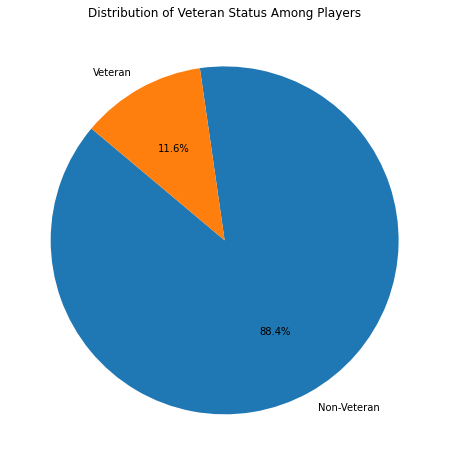

In [0]:

# Convert Spark DataFrame to Pandas DataFrame
player_match_pdf = player_match_df.toPandas()

# Group by 'veteran_status' and count the number of players in each category
veteran_status_counts = player_match_pdf['veteran_status'].value_counts().reset_index()
veteran_status_counts.columns = ['veteran_status', 'count']

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    veteran_status_counts['count'], 
    labels=veteran_status_counts['veteran_status'], 
    autopct='%1.1f%%', 
    startangle=140
)
plt.title('Distribution of Veteran Status Among Players')
plt.show()


In [0]:
ball_by_ball_df.createOrReplaceTempView("ball_by_ball")
match_df.createOrReplaceTempView("match")
player_df.createOrReplaceTempView("player")
player_match_df.createOrReplaceTempView("player_match")
team_df.createOrReplaceTempView("team")

In [0]:
top_scoring_batsmen_per_season = spark.sql("""
SELECT 
p.player_name,
m.season_year,
sum(b.runs_scored) AS total_runs
FROM ball_by_ball b
JOIN match m ON b.match_id = m.match_id
JOIN player_match pm ON m.match_id = pm.match_id AND b.striker = pm.player_id
JOIN player p ON p.player_id = pm.player_id
GROUP BY p.player_name, m.season_year
ORDER BY m.season_year, total_runs DESC
""")

top_scoring_batsmen_per_season.show(20)

+-------------+-----------+----------+
|  player_name|season_year|total_runs|
+-------------+-----------+----------+
|     se marsh|       2008|       614|
|    g gambhir|       2008|       532|
|st jayasuriya|       2008|       508|
|    sr watson|       2008|       463|
|     gc smith|       2008|       437|
| ac gilchrist|       2008|       431|
|    yk pathan|       2008|       430|
|     sk raina|       2008|       420|
|     ms dhoni|       2008|       414|
|     v sehwag|       2008|       399|
|    rg sharma|       2008|       399|
|     r dravid|       2008|       370|
|   sc ganguly|       2008|       349|
|     s dhawan|       2008|       340|
|kc sangakkara|       2008|       319|
|    dj hussey|       2008|       318|
|   rv uthappa|       2008|       316|
|  sa asnodkar|       2008|       311|
| yuvraj singh|       2008|       299|
|     pa patel|       2008|       297|
+-------------+-----------+----------+
only showing top 20 rows



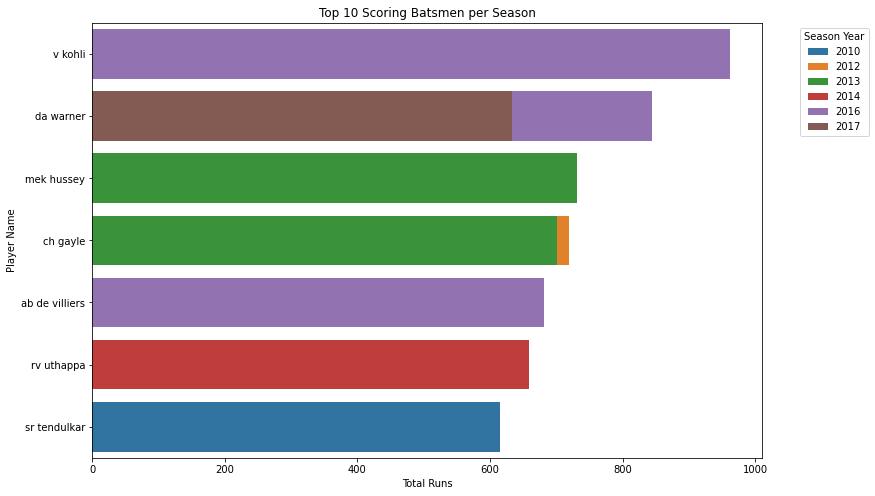

In [0]:
# Convert the Spark DataFrame to a Pandas DataFrame
top_scoring_batsmen_per_season_df = top_scoring_batsmen_per_season.toPandas()

# Filter to get only the top 10 batsmen
top_7_batsmen_df = top_scoring_batsmen_per_season_df.nlargest(10, 'total_runs')

# Create a bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x='total_runs', y='player_name', hue='season_year', data=top_7_batsmen_df, dodge=False)
plt.title('Top 10 Scoring Batsmen per Season')
plt.xlabel('Total Runs')
plt.ylabel('Player Name')
plt.legend(title='Season Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [0]:
economical_bowlers_powerplay = spark.sql("""
SELECT
p.player_name,
avg(b.runs_scored) AS avg_runs_per_ball,
count(b.bowler_wicket) AS total_wickets
FROM ball_by_ball b  
JOIN player_match pm ON b.match_id = pm.match_id AND b.bowler = pm.player_id
JOIN player p ON p.player_id = pm.player_id
WHERE b.over_id <=6
GROUP BY p.player_name
HAVING count(*) >= 1
ORDER BY avg_runs_per_ball, total_wickets DESC                                      
""")

economical_bowlers_powerplay.show(100)

+-----------------+------------------+-------------+
|      player_name| avg_runs_per_ball|total_wickets|
+-----------------+------------------+-------------+
|       sm harwood|0.3333333333333333|            0|
|       ankit soni|               0.5|            0|
|        gr napier|               0.5|            0|
|         aj finch|               0.5|            0|
|          a zampa|               0.5|            0|
|       avesh khan|               0.5|            0|
|         nb singh|0.5833333333333334|            0|
|       ag murtaza|0.6538461538461539|            0|
|        sb bangar|0.6666666666666666|            0|
|       d du preez|0.6666666666666666|            0|
|          s gopal|0.6666666666666666|            0|
|       fh edwards|0.6923076923076923|            0|
|         a kumble|0.7685185185185185|            0|
|         umar gul|0.7777777777777778|            0|
|     kp pietersen|0.7777777777777778|            0|
|  j syed mohammad|0.7777777777777778|        

In [0]:
toss_impact_individual_matches = spark.sql("""
SELECT m.match_id, m.toss_winner, m.toss_name, m.match_winner,
       case WHEN m.toss_winner = m.match_winner THEN "Won" ELSE "Lost" END AS match_outcome
FROM match m
WHERE m.toss_name IS NOT NULL
ORDER BY m.match_id                                                  
""")

toss_impact_individual_matches.show()

+--------+--------------------+---------+--------------------+-------------+
|match_id|         toss_winner|toss_name|        match_winner|match_outcome|
+--------+--------------------+---------+--------------------+-------------+
|  335987|Royal Challengers...|    field|Kolkata Knight Ri...|         Lost|
|  335988| Chennai Super Kings|      bat| Chennai Super Kings|          Won|
|  335989|    Rajasthan Royals|      bat|    Delhi Daredevils|         Lost|
|  335990|      Mumbai Indians|      bat|Royal Challengers...|         Lost|
|  335991|     Deccan Chargers|      bat|Kolkata Knight Ri...|         Lost|
|  335992|     Kings XI Punjab|      bat|    Rajasthan Royals|         Lost|
|  335993|     Deccan Chargers|      bat|    Delhi Daredevils|         Lost|
|  335994|      Mumbai Indians|    field| Chennai Super Kings|         Lost|
|  335995|    Rajasthan Royals|    field|    Rajasthan Royals|          Won|
|  335996|      Mumbai Indians|    field|     Kings XI Punjab|         Lost|

In [0]:
average_runs_in_wins = spark.sql("""
SELECT p.player_name, avg(b.runs_scored) AS avg_runs_in_wins, count(*) AS innings_played
FROM ball_by_ball b
JOIN player_match pm ON b.match_id = pm.match_id AND b.striker = pm.player_id
JOIN player p on pm.player_id = p.player_id
JOIN match m ON pm.match_id = m.match_id
WHERE m.match_winner = pm.player_team
GROUP BY p.player_name
ORDER BY avg_runs_in_wins ASC 
""")

average_runs_in_wins.show()

+--------------+-------------------+--------------+
|   player_name|   avg_runs_in_wins|innings_played|
+--------------+-------------------+--------------+
|       a nehra|                0.0|             2|
|    kp appanna|                0.0|             1|
|     jj bumrah|                0.0|             2|
|      i sharma|                0.0|             1|
|      ts mills|                0.0|             3|
|      j theron|                0.0|             1|
|      vr aaron|                0.0|             5|
|     sn thakur|                0.0|             2|
| anirudh singh|                0.0|             1|
|    t thushara|                0.2|             5|
|     sa abbott|               0.25|             4|
| yashpal singh| 0.3157894736842105|            19|
|   s sreesanth| 0.3333333333333333|             3|
|   kc cariappa| 0.3333333333333333|             3|
|    jd unadkat|                0.4|             5|
|    sm harwood|0.42857142857142855|             7|
|      r shu

In [0]:
top_wicket_takers = spark.sql("""
SELECT p.player_name, count(*) AS total_wickets
FROM ball_by_ball b 
JOIN player_match pm ON b.match_id = pm.match_id AND b.bowler = pm.player_id
JOIN player p ON pm.player_id = p.player_id
WHERE b.bowler_wicket = 1
GROUP BY p.player_name
ORDER BY total_wickets DESC                           
""")

top_wicket_takers.show()

+-----------+-------------+
|player_name|total_wickets|
+-----------+-------------+
+-----------+-------------+



In [0]:
team_performance = spark.sql("""
SELECT m.match_winner, count(*) AS wins
FROM match m
WHERE m.match_winner NOT IN ('tied', 'abandoned','NULL')
GROUP BY m.match_winner
ORDER BY wins DESC                        
""")
team_performance.show()

+--------------------+----+
|        match_winner|wins|
+--------------------+----+
|      Mumbai Indians|  91|
| Chennai Super Kings|  79|
|Kolkata Knight Ri...|  77|
|Royal Challengers...|  73|
|     Kings XI Punjab|  70|
|    Rajasthan Royals|  63|
|    Delhi Daredevils|  62|
| Sunrisers Hyderabad|  42|
|     Deccan Chargers|  29|
|Rising Pune Super...|  15|
|       Gujarat Lions|  13|
|       Pune Warriors|  12|
|Kochi Tuskers Kerala|   6|
+--------------------+----+



In [0]:
max_runs_teams = spark.sql("""
SELECT m.match_winner, sum(b.runs_scored) AS total_runs
FROM match m
JOIN ball_by_ball b ON m.match_id = b.match_id
WHERE m.match_winner NOT IN ('tied', 'abandoned','NULL')
GROUP BY m.match_winner
ORDER BY total_runs DESC                           
""")

max_runs_teams.show()

+--------------------+----------+
|        match_winner|total_runs|
+--------------------+----------+
|      Mumbai Indians|     26425|
| Chennai Super Kings|     23342|
|Royal Challengers...|     21250|
|Kolkata Knight Ri...|     21170|
|     Kings XI Punjab|     20678|
|    Rajasthan Royals|     18102|
|    Delhi Daredevils|     18059|
| Sunrisers Hyderabad|     12069|
|     Deccan Chargers|      8223|
|       Gujarat Lions|      4126|
|Rising Pune Super...|      4086|
|       Pune Warriors|      3266|
|Kochi Tuskers Kerala|      1555|
+--------------------+----------+



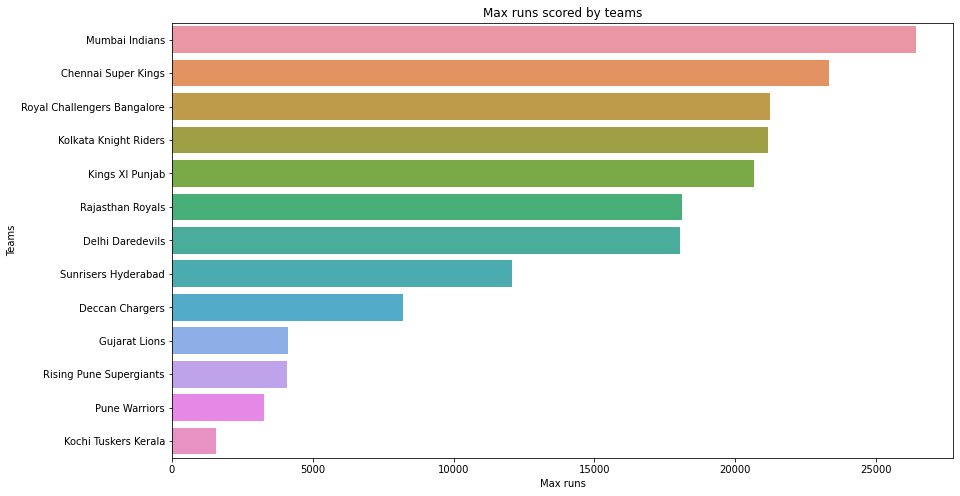

In [0]:
# Convert to Pandas DataFrame
max_runs_team_pd = max_runs_teams.toPandas()

# Plot
plt.figure(figsize=(14, 8))
sns.barplot(x='total_runs', y='match_winner', data=max_runs_team_pd)
plt.title('Max runs scored by teams')
plt.xlabel('Max runs')
plt.ylabel('Teams')
plt.show()

In [0]:
matches_with_highest_scores = spark.sql("""
SELECT m.match_id, m.team1, m.team2, sum(b.runs_scored) AS total_runs
FROM match m
JOIN ball_by_ball b ON m.match_id = b.match_id
GROUP BY m.match_id, m.team1, m.team2
ORDER BY total_runs DESC                                       
""")
matches_with_highest_scores.show()

+--------+--------------------+--------------------+----------+
|match_id|               team1|               team2|total_runs|
+--------+--------------------+--------------------+----------+
|  419142| Chennai Super Kings|    Rajasthan Royals|       447|
|  335988|     Kings XI Punjab| Chennai Super Kings|       426|
| 1082641|      Mumbai Indians|     Kings XI Punjab|       419|
|  829800|      Mumbai Indians|Royal Challengers...|       419|
|  335995|     Deccan Chargers|    Rajasthan Royals|       417|
|  501228|    Delhi Daredevils|     Kings XI Punjab|       408|
| 1082632|    Delhi Daredevils|       Gujarat Lions|       405|
|  733992|     Kings XI Punjab| Chennai Super Kings|       404|
|  419112|      Mumbai Indians|    Rajasthan Royals|       399|
|  734052| Chennai Super Kings|     Kings XI Punjab|       397|
| 1082610|       Gujarat Lions|Royal Challengers...|       393|
|  548377|    Delhi Daredevils|Royal Challengers...|       392|
|  729288| Chennai Super Kings|     King

In [0]:
most_consistent_batsmen = spark.sql("""
SELECT p.player_name, AVG(b.runs_scored) AS avg_runs, STDDEV(b.runs_scored) AS std_dev_runs
FROM ball_by_ball b
JOIN player_match pm ON b.match_id = pm.match_id AND b.striker = pm.player_id
JOIN player p ON pm.player_id = p.player_id
GROUP BY p.player_name
HAVING COUNT(*) > 20 -- Consider only players with more than 20 innings
ORDER BY avg_runs DESC, std_dev_runs ASC
LIMIT 20
""")

most_consistent_batsmen.show()

+-------------+------------------+------------------+
|  player_name|          avg_runs|      std_dev_runs|
+-------------+------------------+------------------+
|  bcj cutting| 1.878787878787879| 2.173371372670378|
|       aj tye|1.8275862068965518|1.9099170796742793|
|cr brathwaite|1.7924528301886793| 2.256260440555752|
|shahid afridi|1.7608695652173914|2.2229588151200206|
|      sn khan|1.7425742574257426| 1.735819491459493|
|   ad russell|1.7341389728096677| 1.992869280335973|
|    lj wright| 1.728813559322034|1.8553790250807316|
|    kk cooper|1.7164179104477613|2.0656349097264055|
|   auk pathan|1.6956521739130435| 2.098371286339948|
|   gj maxwell| 1.646505376344086|1.9824366486523373|
|    ch morris|1.6401515151515151|1.7816282486814126|
| kamran akmal|1.6103896103896105|2.0400970317212868|
|   tg southee| 1.588235294117647|1.7772577968016727|
|      ca lynn|1.5850622406639003| 1.911049258115366|
|    kh pandya|1.5841584158415842| 1.775107459107086|
|     v sehwag|1.55919540229

In [0]:
venue_impact = spark.sql(""" 
SELECT m.venue_name, avg(b.runs_scored) AS avg_runs
FROM match m
JOIN ball_by_ball b ON b.match_id = m.match_id
GROUP BY m.venue_name
ORDER BY avg_runs DESC
""")

venue_impact.show()

+--------------------+------------------+
|          venue_name|          avg_runs|
+--------------------+------------------+
|Holkar Cricket St...|1.4213051823416507|
|Saurashtra Cricke...|1.3843817787418655|
|          Green Park| 1.382716049382716|
|   Brabourne Stadium|1.3795227097767513|
|Punjab Cricket As...|1.3640552995391706|
|Punjab Cricket As...|1.3557046979865772|
|M Chinnaswamy Sta...| 1.328109965635739|
|    Barabati Stadium| 1.318621523579202|
|Maharashtra Crick...| 1.310294968189705|
|Punjab Cricket As...| 1.296106813077115|
|Himachal Pradesh ...|1.2947921643573816|
|    Feroz Shah Kotla|1.2933580705009275|
|    Wankhede Stadium|1.2858773398265104|
|Rajiv Gandhi Inte...|1.2857903139968068|
|Sardar Patel Stad...|1.2739579622372639|
|MA Chidambaram St...|1.2674654215487622|
|Rajiv Gandhi Inte...|1.2476995506098867|
|        Eden Gardens|1.2420516551473264|
|     SuperSport Park|1.2390988372093024|
|Sharjah Cricket S...|1.2281831187410586|
+--------------------+------------

In [0]:
win_rate = spark.sql(""" 
SELECT m.venue_name, m.match_winner, count(*) AS wins
FROM match m
GROUP BY m.venue_name, m.match_winner
ORDER BY  wins DESC
""")

win_rate.show()

+--------------------+--------------------+----+
|          venue_name|        match_winner|wins|
+--------------------+--------------------+----+
|        Eden Gardens|Kolkata Knight Ri...|  37|
|    Wankhede Stadium|      Mumbai Indians|  34|
|MA Chidambaram St...| Chennai Super Kings|  33|
|M Chinnaswamy Sta...|Royal Challengers...|  30|
|Sawai Mansingh St...|    Rajasthan Royals|  24|
|    Feroz Shah Kotla|    Delhi Daredevils|  23|
|Punjab Cricket As...|     Kings XI Punjab|  18|
|Rajiv Gandhi Inte...| Sunrisers Hyderabad|  14|
|        Eden Gardens|      Mumbai Indians|   9|
|M Chinnaswamy Sta...|      Mumbai Indians|   8|
|Sardar Patel Stad...|    Rajasthan Royals|   7|
|   Brabourne Stadium|      Mumbai Indians|   6|
|M Chinnaswamy Sta...|Kolkata Knight Ri...|   6|
|Rajiv Gandhi Inte...| Sunrisers Hyderabad|   6|
|Maharashtra Crick...|Rising Pune Super...|   5|
|    Feroz Shah Kotla|Kolkata Knight Ri...|   5|
|    Feroz Shah Kotla|Royal Challengers...|   5|
|M Chinnaswamy Sta..

In [0]:
best_overs_for_scoring_runs = spark.sql("""
SELECT b.over_id, AVG(b.runs_scored) AS avg_runs_per_over
FROM ball_by_ball b 
GROUP BY b.over_id
ORDER BY avg_runs_per_over DESC                                        
""")

best_overs_for_scoring_runs.show()

+-------+------------------+
|over_id| avg_runs_per_over|
+-------+------------------+
|     20| 1.664877868245744|
|     19| 1.572963438101347|
|     18|1.5388291517323776|
|     17|1.4671564390665515|
|     16|1.3959097320169251|
|     15|1.3534613790244576|
|     14|1.2872905598692277|
|      6| 1.286316899551806|
|      5| 1.272739221871714|
|      4|1.2615263365296203|
|     13| 1.247369840841651|
|     12| 1.244331141822085|
|     11|1.2084890549919916|
|      3|1.2051753579403652|
|      9|1.1634844868735084|
|     10|1.1403159431833267|
|      8| 1.117538298996302|
|      2|1.0805095876017863|
|      7|1.0352382209317672|
|      1|0.9021442495126706|
+-------+------------------+



In [0]:
best_finisher = spark.sql("""
SELECT p.player_name, avg(b.runs_scored) AS avg_runs_last_5_overs
FROM ball_by_ball b 
JOIN player_match pm ON b.match_id = pm.match_id AND b.striker = pm.player_id
JOIN player p ON pm.player_id = p.player_id 
WHERE b.over_id >15
GROUP BY p.player_name
ORDER BY avg_runs_last_5_overs DESC                        
""")

best_finisher.show()

+--------------+---------------------+
|   player_name|avg_runs_last_5_overs|
+--------------+---------------------+
|      dt patil|                  4.0|
|      pa reddy|                  3.0|
|   salman butt|   2.6666666666666665|
| cr brathwaite|   2.4193548387096775|
|       hm amla|   2.3529411764705883|
|   yv takawale|   2.3333333333333335|
|     lpc silva|                  2.3|
|       m vohra|   2.2962962962962963|
|     bj rohrer|    2.257142857142857|
|    ma agarwal|                 2.25|
|     lj wright|   2.2222222222222223|
|      v sehwag|    2.212121212121212|
| shahid afridi|                  2.2|
|ab de villiers|    2.169429097605893|
|    jc buttler|   2.1403508771929824|
|      ch gayle|   2.1297297297297297|
|    er dwivedi|    2.111111111111111|
|   misbahulhaq|                  2.1|
|   pc valthaty|    2.090909090909091|
|      umar gul|   2.0526315789473686|
+--------------+---------------------+
only showing top 20 rows



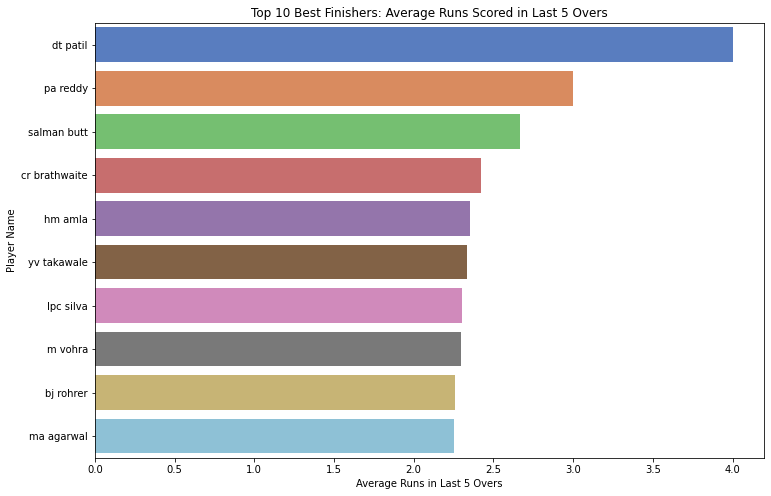

In [0]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convert the Spark DataFrame to a Pandas DataFrame
best_finisher_df = best_finisher.toPandas()

# Filter to get only the top 10 finishers
top_10_finishers_df = best_finisher_df.nlargest(10, 'avg_runs_last_5_overs')

# Create a bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x='avg_runs_last_5_overs', y='player_name', data=top_10_finishers_df, palette='muted')
plt.title('Top 10 Best Finishers: Average Runs Scored in Last 5 Overs')
plt.xlabel('Average Runs in Last 5 Overs')
plt.ylabel('Player Name')
plt.show()


In [0]:
import matplotlib.pyplot as plt

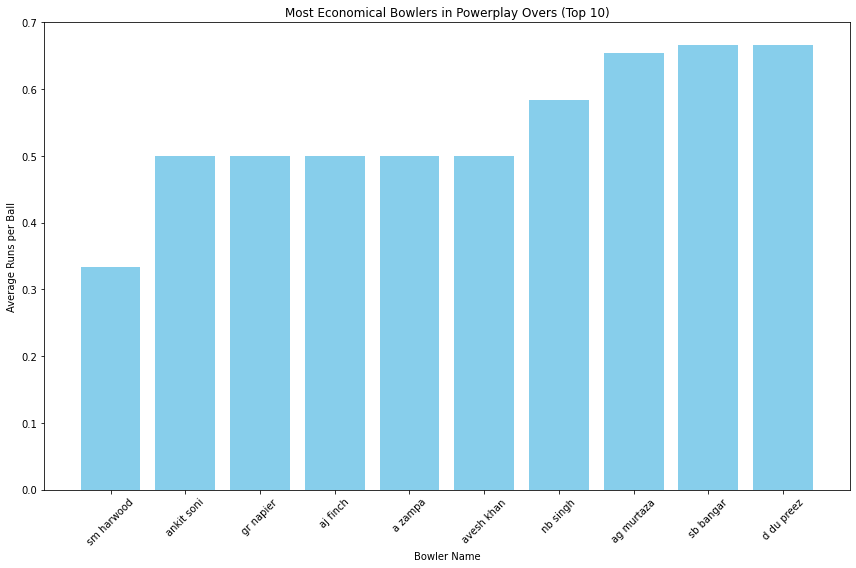

In [0]:
# Assuming 'economical_bowlers_powerplay' is already executed and available as a Spark DataFrame
economical_bowlers_pd = economical_bowlers_powerplay.toPandas()

# Visualizing using Matplotlib
plt.figure(figsize=(12, 8))
# Limiting to top 10 for clarity in the plot
top_economical_bowlers = economical_bowlers_pd.nsmallest(10, 'avg_runs_per_ball')
plt.bar(top_economical_bowlers['player_name'], top_economical_bowlers['avg_runs_per_ball'], color='skyblue')
plt.xlabel('Bowler Name')
plt.ylabel('Average Runs per Ball')
plt.title('Most Economical Bowlers in Powerplay Overs (Top 10)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [0]:
import seaborn as sns

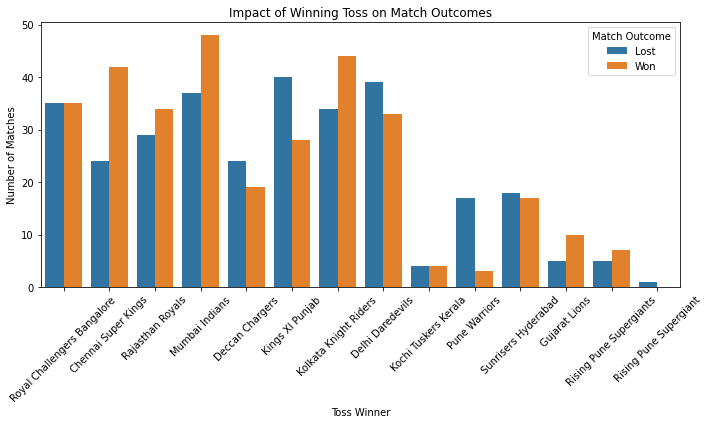

In [0]:
toss_impact_pd = toss_impact_individual_matches.toPandas()

# Creating a countplot to show win/loss after winning toss
plt.figure(figsize=(10, 6))
sns.countplot(x='toss_winner', hue='match_outcome', data=toss_impact_pd)
plt.title('Impact of Winning Toss on Match Outcomes')
plt.xlabel('Toss Winner')
plt.ylabel('Number of Matches')
plt.legend(title='Match Outcome')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

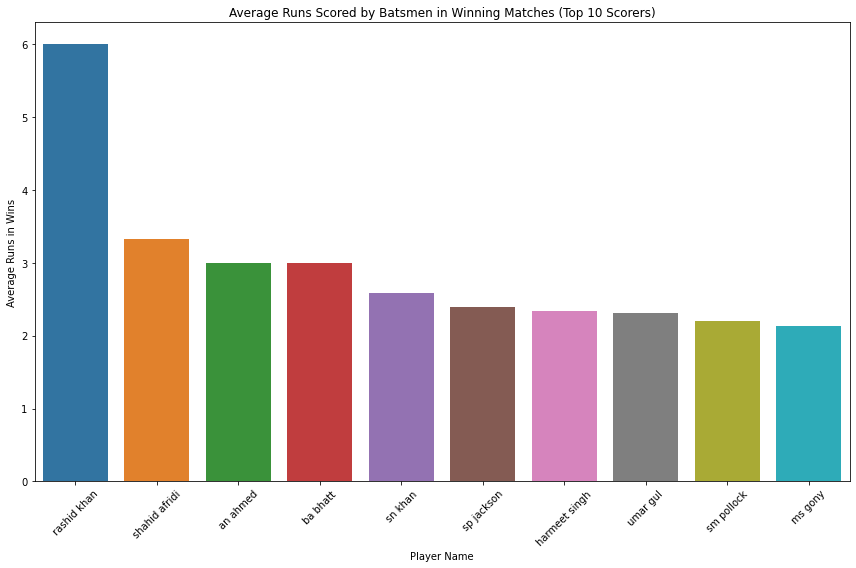

In [0]:
average_runs_pd = average_runs_in_wins.toPandas()

# Using seaborn to plot average runs in winning matches
plt.figure(figsize=(12, 8))
top_scorers = average_runs_pd.nlargest(10, 'avg_runs_in_wins')
sns.barplot(x='player_name', y='avg_runs_in_wins', data=top_scorers)
plt.title('Average Runs Scored by Batsmen in Winning Matches (Top 10 Scorers)')
plt.xlabel('Player Name')
plt.ylabel('Average Runs in Wins')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [0]:
# Execute SQL Query
scores_by_venue = spark.sql("""
SELECT venue_name, AVG(total_runs) AS average_score, MAX(total_runs) AS highest_score
FROM (
    SELECT ball_by_ball.match_id, match.venue_name, SUM(runs_scored) AS total_runs
    FROM ball_by_ball
    JOIN match ON ball_by_ball.match_id = match.match_id
    GROUP BY ball_by_ball.match_id, match.venue_name
)
GROUP BY venue_name
ORDER BY average_score DESC
""")

scores_by_venue.show()

+--------------------+------------------+-------------+
|          venue_name|     average_score|highest_score|
+--------------------+------------------+-------------+
|   Brabourne Stadium| 325.8181818181818|          399|
|Saurashtra Cricke...|             319.1|          393|
|Punjab Cricket As...|317.42857142857144|          341|
|    Barabati Stadium|311.57142857142856|          404|
|          Green Park|             308.0|          378|
|Maharashtra Crick...|302.06666666666666|          377|
|Rajiv Gandhi Inte...|             302.0|          365|
|Himachal Pradesh ...| 301.1111111111111|          371|
|MA Chidambaram St...| 299.7291666666667|          447|
|Sardar Patel Stad...|             298.0|          377|
|Punjab Cricket As...|296.77142857142854|          426|
|    Wankhede Stadium| 296.4736842105263|          419|
|Holkar Cricket St...|             296.2|          371|
|Punjab Cricket As...|             296.0|          380|
|M Chinnaswamy Sta...| 292.7878787878788|       

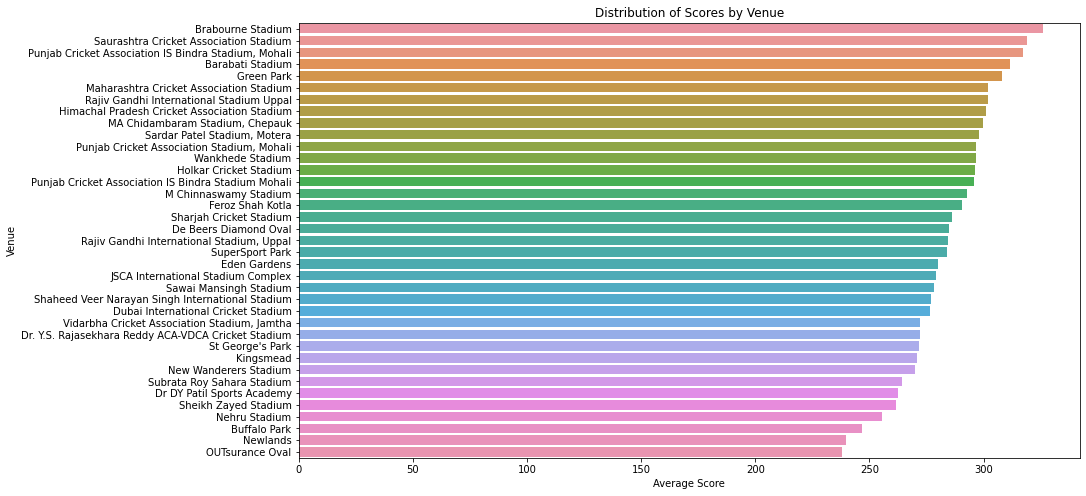

In [0]:
# Convert to Pandas DataFrame
scores_by_venue_pd = scores_by_venue.toPandas()

# Plot
plt.figure(figsize=(14, 8))
sns.barplot(x='average_score', y='venue_name', data=scores_by_venue_pd)
plt.title('Distribution of Scores by Venue')
plt.xlabel('Average Score')
plt.ylabel('Venue')
plt.show()

In [0]:
# Execute SQL Query
dismissal_types = spark.sql("""
SELECT out_type, COUNT(*) AS frequency
FROM ball_by_ball
WHERE out_type NOT IN  ('NULL','Not Applicable')
GROUP BY out_type
ORDER BY frequency DESC
""")

dismissal_types.show()


+--------------------+---------+
|            out_type|frequency|
+--------------------+---------+
|              caught|     3678|
|              bowled|     1382|
|             run out|      744|
|        Keeper Catch|      695|
|                 lbw|      455|
|             stumped|      222|
|   caught and bowled|      211|
|          hit wicket|        9|
|        retired hurt|        9|
|obstructing the f...|        1|
+--------------------+---------+



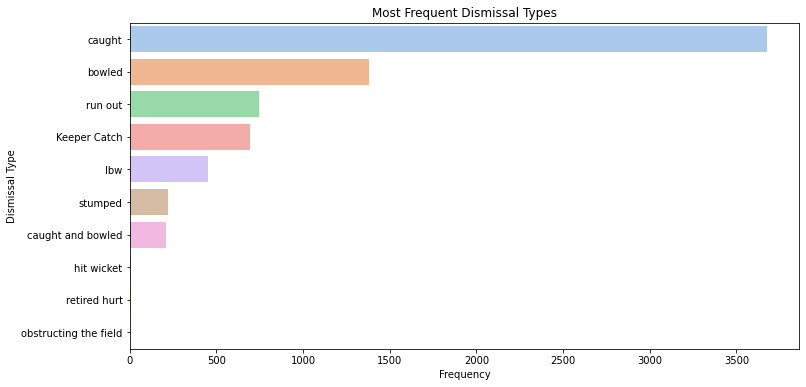

In [0]:
# Convert to Pandas DataFrame
dismissal_types_pd = dismissal_types.toPandas()

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x='frequency', y='out_type', data=dismissal_types_pd, palette='pastel')
plt.title('Most Frequent Dismissal Types')
plt.xlabel('Frequency')
plt.ylabel('Dismissal Type')
plt.show()
     

In [0]:
# Execute SQL Query
team_toss_win_performance = spark.sql("""
SELECT team1, COUNT(*) AS matches_played, SUM(CASE WHEN toss_winner = match_winner THEN 1 ELSE 0 END) AS wins_after_toss
FROM match
WHERE toss_winner = team1
GROUP BY team1
ORDER BY wins_after_toss DESC
""")

team_toss_win_performance.show()

+--------------------+--------------+---------------+
|               team1|matches_played|wins_after_toss|
+--------------------+--------------+---------------+
| Chennai Super Kings|            37|             27|
|      Mumbai Indians|            42|             26|
|Kolkata Knight Ri...|            36|             24|
|Royal Challengers...|            34|             19|
|    Delhi Daredevils|            36|             17|
|    Rajasthan Royals|            25|             16|
|     Kings XI Punjab|            32|             14|
| Sunrisers Hyderabad|            16|              8|
|     Deccan Chargers|            22|              6|
|Rising Pune Super...|             6|              4|
|       Gujarat Lions|             7|              3|
|Kochi Tuskers Kerala|             4|              2|
|       Pune Warriors|            10|              2|
+--------------------+--------------+---------------+



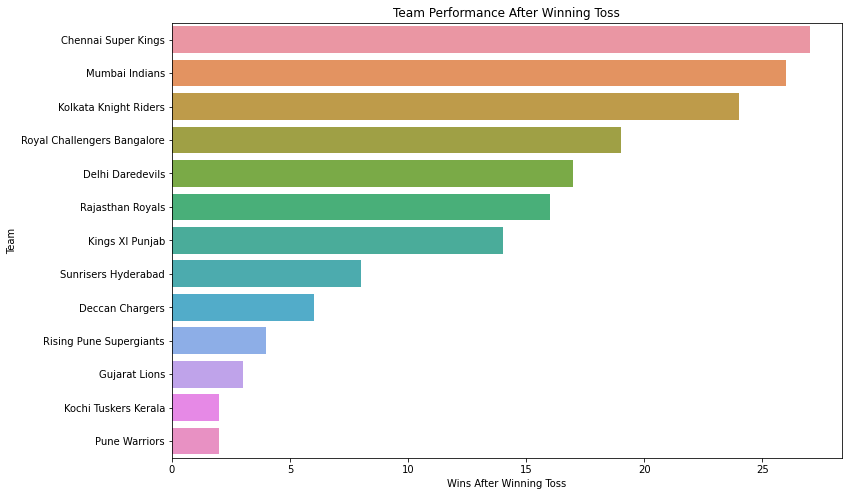

In [0]:
# Convert to Pandas DataFrame
team_toss_win_pd = team_toss_win_performance.toPandas()

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(x='wins_after_toss', y='team1', data=team_toss_win_pd)
plt.title('Team Performance After Winning Toss')
plt.xlabel('Wins After Winning Toss')
plt.ylabel('Team')
plt.show()
